# Assignment 2

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [5]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

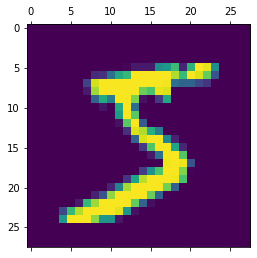

In [11]:
plt.matshow(x_train[0])

In [12]:
x_train = x_train/255
x_test =x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation ='softmax')
    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train ,validation_data =(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6636 - accuracy: 0.8314 - val_loss: 0.3601 - val_accuracy: 0.8967
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3383 - accuracy: 0.9054 - val_loss: 0.2949 - val_accuracy: 0.9173
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2904 - accuracy: 0.9190 - val_loss: 0.2650 - val_accuracy: 0.9260
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2607 - accuracy: 0.9267 - val_loss: 0.2435 - val_accuracy: 0.9324
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2377 - accuracy: 0.9332 - val_loss: 0.2225 - val_accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2188 - accuracy: 0.9384 - val_loss: 0.2061 - val_accuracy: 0.9413
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2029 - accuracy: 0.9427 - val_loss: 0.1941 - val_accurac

In [18]:
test_loss, test_acc= model.evaluate(x_test,y_test)
print("Loss =%3f" %test_loss)
print("Accuracy=%3d"%test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1647 - accuracy: 0.9521
Loss =0.164718
Accuracy=  0


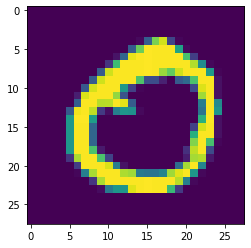

In [19]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [20]:
predicted_value = model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is= 0


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

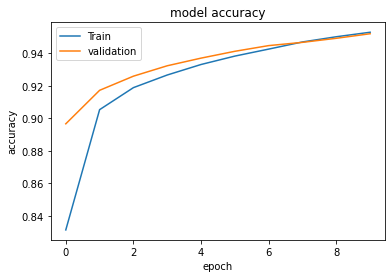

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['Train','validation'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

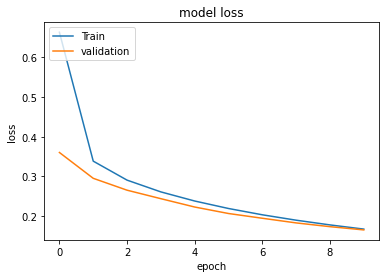

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['Train','validation'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

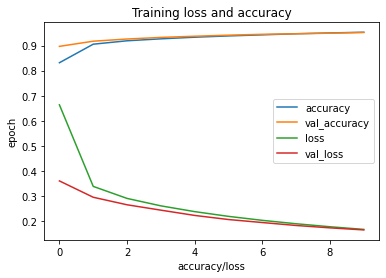

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss and accuracy')
plt.xlabel("accuracy/loss")
plt.ylabel("epoch")
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show